# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Note: Submission.csv should contain dataset of size 367 x 2 with fields Loan_id and Loan_status

In this notebook we will be doing:<br>
--> EDA<br>
--> See how different algorithms perform without preprocessing, parameter tuning<br>
--> See which algorithm is performing best<br>
--> We will then perform preprocessing, then evaluate and later we will perform parameter tuning<br>

Steps to perform:

=> EDA:
1. visulaize
2. write inferences

=> Preprocessing:
1. Handle null values
2. removing not necessary features
3. label encoding boolean/ordinal features and scaling numerical features

=> Feature generation

=> Training

=> Parameter tuning

In [251]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [252]:
# Importing dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

<h2>EDA</h2>
<p>Every data science projects starts by understanding Data. So lets understand what our features are and what our target is</p>

In [253]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


==> So it is a <b>Binary classification problem</b>

Let us see what are our categorical features and numerical features

In [254]:
null_data = train_df[train_df.isnull().any(axis=1)]

In [255]:
null_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [257]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
5. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
6. Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [258]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Now let us see all null values in our dataset

In [259]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We do have null values in our dataset. Now it is time to figure out why do we have null values. Is it because the data was not provided by users or is it because the data doesn't exist with the user.

Also let us first look if our test dataset contain any null values.

In [260]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Test data too contains the null values.

<h3>What to do with null values?</h3>

We can do either of the following:

Remove rows with null values 

or

1. Replace with mean (mean imputation)
2. Replace with median (median imputation)
3. Replace with mode
4. Replace with some constant and Add new feature isNull
5. Train a model to predict null values
6. Train our dataset with GBDT as it can handle null values.

In [261]:
train_missing_cols = []
test_missing_cols = []
for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        train_missing_cols.append(col)

for col in test_df.columns:
    if test_df[col].isnull().sum() > 0:
        test_missing_cols.append(col)

In [262]:
train_missing_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [263]:
cat_cols = []
num_cols = []
for col in train_df.columns[1:-1]:
    if train_df[col].dtype=='O':
        cat_cols.append(col)
    else:
        num_cols.append(col)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

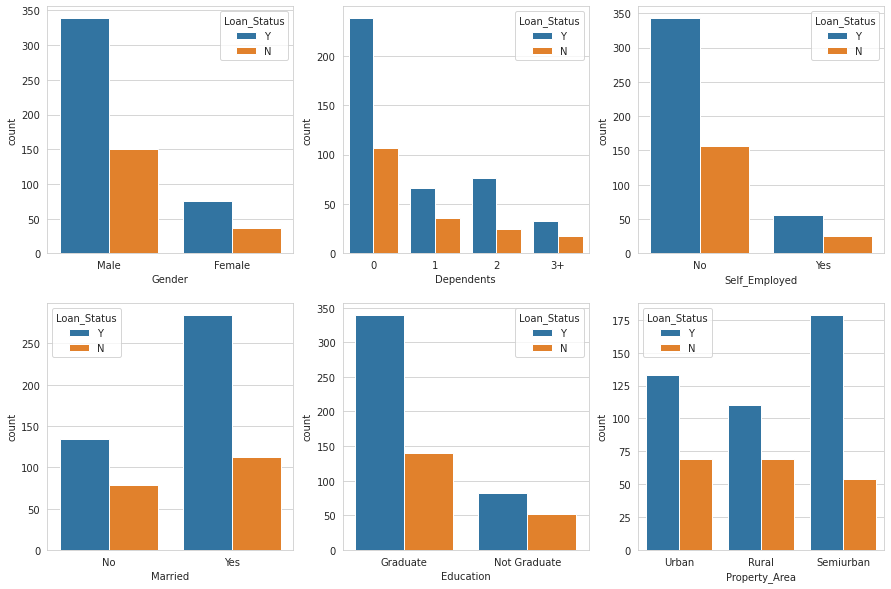

In [264]:
l=len(cat_cols)
fig, axes = plt.subplots(int(l/3),3, figsize=(15,10))

for i in range(l):
    sns.countplot(x=cat_cols[i],data=train_df,hue='Loan_Status',ax=axes[i%2,i//2])
    

Loan_Status is 'Y' (Generalization based on majority count):
1. dependents is 0
2. self_employed is fasle
3. education is graduate
4. property_area is urban or semiurban

5. Gender is male
6. Married is yes

/home/sidharthjain/anaconda3/envs/tensorflow_ml/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sidharthjain/anaconda3/envs/tensorflow_ml/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


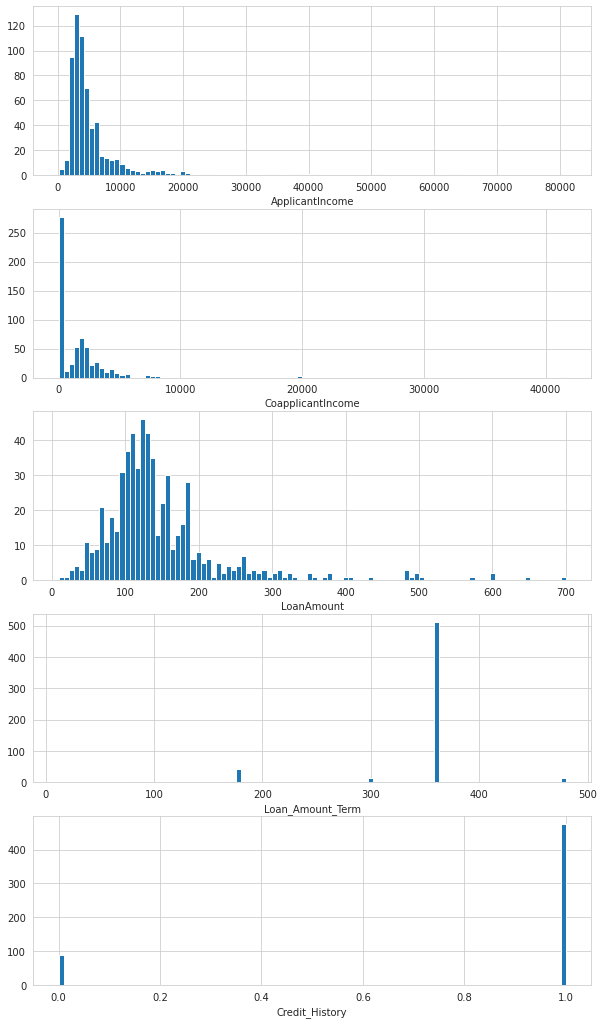

In [265]:
#plot hist for numerical cols
l = len(num_cols)
fig, ax = plt.subplots(l,1,figsize=(10,18))
for i in range(l):
    ax[i].hist(train_df[num_cols[i]], bins=100)
    ax[i].set_xlabel(num_cols[i])

Insights:
1. Most of the peoples income is between 2k-5k
2. Many coapplicant's income is 0
3. Loan Amount mostly is between 90-170
4. Loan Amount Term is taking only values 180(nearly 50) and 360 (500+) and few 300
5. Many of them have credit history (1)

In [266]:
# # Below plot is simply plotted

# target = labelEncoder.fit_transform(train_df['ApplicantIncome'])
# l = len(cat_cols)
# fig, ax = plt.subplots(int(l/3),3, figsize=(15,10))

# for n in range(l):
#     i = n%2
#     j = n//2
#     sns.barplot(train_df[cat_cols[i]], target, ax=ax[i,j])

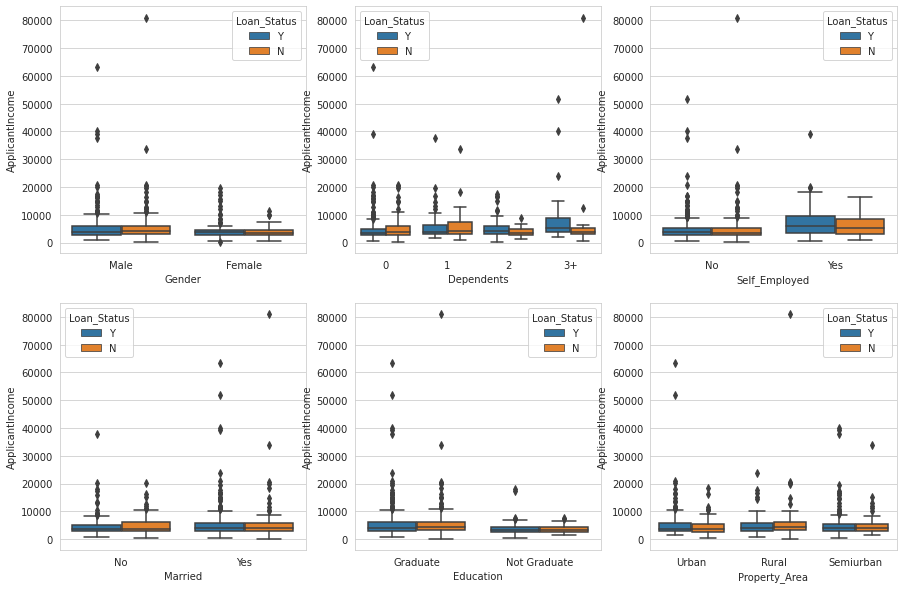

In [267]:
l = len(cat_cols)
fig, axes = plt.subplots(int(l/3),3, figsize=(15,10))

for i in range(l):
    sns.boxplot(x=cat_cols[i], y='ApplicantIncome', hue = 'Loan_Status', data=train_df, ax=axes[i%2, i//2])

<h3>Pandas Profiling Report is just awesome!</h3>

In [268]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(train_df)
# prof

# Preprocessing

1. Categorical encoding
2. Handling missing values
3. Scaling (We will see how the models perform with and without scaling)

In [269]:
features = cat_cols+num_cols

We can handle numerical and categorical features in many ways as follows.

This is the easiest way of handling null values.
Here, we are replacing categorical feature nan with the highest occuring values and numerical feature nan with mean values.

In [270]:
# #Filling null values

# imputed_train_df = train_df.copy()
# imputed_test_df = test_df.copy()

# for col in num_cols:
#     imputed_train_df[col].fillna(train_df[col].mean(), inplace=True)
#     imputed_test_df[col].fillna(train_df[col].mean(), inplace=True)

# for col in cat_cols:
#     imputed_train_df[col].fillna(train_df[col].mode()[0], inplace=True)
#     imputed_test_df[col].fillna(train_df[col].mode()[0], inplace=True)

# imputed_train_df = imputed_train_df[features]
# imputed_test_df = imputed_test_df[features]

# # Categorical encoding

# from sklearn.preprocessing import LabelEncoder

# for col in cat_cols:
#     labelEncoder = LabelEncoder()
#     imputed_train_df[col] = labelEncoder.fit_transform(imputed_train_df[col])
#     imputed_test_df[col] = labelEncoder.transform(imputed_test_df[col])

# imputed_train_df.head()

Note: pd.get_dummnies() doesn't retain nan values and thus nan values may be filled with incorrect data.
However, parameter dummy_na=True will add new features denoting null values

In [271]:
# #### Encoding categrical Features : ##########
# imputed_train_df = pd.get_dummies(train_df[features],dummy_na=True, drop_first=True)
# imputed_test_df = pd.get_dummies(test_df[features], dummy_na=True,drop_first=True)

# for col in num_cols:
#     imputed_train_df[col].fillna(train_df[col].mean(), inplace=True)
#     imputed_test_df[col].fillna(train_df[col].mean(), inplace=True)
# imputed_train_df.head()

Now, we will use SimpleImputer from sklearn.impute to handle numerical null values by replacing them with mean.

<b>Note: </b> mean can be highly affected by outliers and thus median might be a better option.
Try tweaking strategy='median'

In [272]:
from sklearn.impute import SimpleImputer

### Encoding categrical Features: ##########
imputed_train_df = pd.get_dummies(train_df[features],drop_first=True)
retain_imputed_train_df_cols = imputed_train_df.columns
imputed_test_df = pd.get_dummies(test_df[features],drop_first=True)
retain_imputed_test_df_cols = imputed_test_df.columns

### Handling Numerical null values ########
simpleImputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_train_df = pd.DataFrame(simpleImputer.fit_transform(imputed_train_df))
imputed_test_df = pd.DataFrame(simpleImputer.transform(imputed_test_df))
imputed_train_df.columns = retain_imputed_train_df_cols
imputed_test_df.columns = retain_imputed_test_df_cols
imputed_train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


reference:https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531

In [273]:
# Last observation carried forward
# train_df = train_df.fillna(method = 'ffill')  #forward-fill
# test_df = test_df.fillna(method='ffill')
# train_df = train_df.dropna(axis=0, subset=["LoanAmount"])


In [274]:
X = imputed_train_df
y = train_df[train_df.columns[-1]]
test_X = imputed_test_df

<h3>Data splitting</h3>

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [276]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4106.0,0.0,40.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,8072.0,240.0,253.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,7583.0,0.0,187.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<h3>Training without scaling</h3>

In [277]:
from sklearn.linear_model import LogisticRegression as lrc
from sklearn.svm import SVC as svc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.naive_bayes import GaussianNB as gnb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
models = [lrc(max_iter=1000), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

print("Validation accuracy:\n")

i=0
for model in models:
    i+=1
    model.fit(X_train, y_train)
    cvpred = model.predict(X_val)
    pred = model.predict(test_X)
    my_submission = pd.DataFrame({'Loan_ID': test_df.Loan_ID, 'Loan_Status': pred})
    my_submission.to_csv('pred'+str(i)+'.csv', index=False)
    print(accuracy_score(y_val, cvpred))
    print(classification_report(y_val, cvpred))

Validation accuracy:

0.7980295566502463
              precision    recall  f1-score   support

           N       0.94      0.46      0.62        72
           Y       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203

0.645320197044335
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        72
           Y       0.65      1.00      0.78       131

    accuracy                           0.65       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203

0.5665024630541872
              precision    recall  f1-score   support

           N       0.25      0.11      0.15        72
           Y       0.63      0.82      0.71       131

    accuracy                           0.57       203
   macro avg       0.44      0.46      0.43       

/home/sidharthjain/anaconda3/envs/tensorflow_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7881773399014779
              precision    recall  f1-score   support

           N       0.84      0.50      0.63        72
           Y       0.78      0.95      0.85       131

    accuracy                           0.79       203
   macro avg       0.81      0.72      0.74       203
weighted avg       0.80      0.79      0.77       203

0.7783251231527094
              precision    recall  f1-score   support

           N       0.86      0.44      0.59        72
           Y       0.76      0.96      0.85       131

    accuracy                           0.78       203
   macro avg       0.81      0.70      0.72       203
weighted avg       0.80      0.78      0.76       203

0.7931034482758621
              precision    recall  f1-score   support

           N       0.86      0.50      0.63        72
           Y       0.78      0.95      0.86       131

    accuracy                           0.79       203
   macro avg       0.82      0.73      0.74       203
weighted avg     

<h2>Scaling</h2>
<h3>Note: Scaling shouldn't be done on categorical features</h3>

Distance based algorithms(Knn, kmeans ,svm) and gradient based algorithms(Neural networks, Logistic regression, linear regression) doesn't perform well without scaling and thus let's apply scaling and see how algorithms perform.

reference:https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = X_train.copy()
X_val2 = X_val.copy()
X_train2[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val2[num_cols] = scaler.transform(X_val[num_cols])


models = [lrc(max_iter=1000), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

print("Validation accuracy:\n")

i=0
for model in models:
    i+=1
    model.fit(X_train2, y_train)
    cvpred = model.predict(X_val2)
    pred = model.predict(test_X)
    my_submission = pd.DataFrame({'Loan_ID': test_df.Loan_ID, 'Loan_Status': pred})
    my_submission.to_csv('pred2'+str(i)+'.csv', index=False)
    print(accuracy_score(y_val, cvpred))
#     print(classification_report(y_val, cvpred))

Validation accuracy:

0.7980295566502463
0.8029556650246306
0.7832512315270936
0.6847290640394089
0.7881773399014779
0.7783251231527094
0.7980295566502463


In [279]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_train3 = X_train.copy()
X_val3 = X_val.copy()
X_train3[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val3[num_cols] = scaler.transform(X_val[num_cols])

models = [lrc(max_iter=1000), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

print("Validation accuracy:\n")
i=0
for model in models:
    i+=1
    model.fit(X_train3, y_train)
    cvpred = model.predict(X_val3)
    pred = model.predict(test_X)
    my_submission = pd.DataFrame({'Loan_ID': test_df.Loan_ID, 'Loan_Status': pred})
    my_submission.to_csv('pred3'+str(i)+'.csv', index=False)
    print(accuracy_score(y_val, cvpred))
#     print(classification_report(y_val, cvpred))

Validation accuracy:

0.7980295566502463
0.7980295566502463
0.7093596059113301
0.6945812807881774
0.7783251231527094
0.7783251231527094
0.7980295566502463


<b>Note: </b>Scaling does increase accuracy of svm, logistic regression. However, it doesn't affect tree based models and probability bases models.

# Parameter Tuning

In [280]:
# from sklearn.model_selection import GridSearchCV
# models = [lrc(max_iter=2000), svc(), knnc(), dtc(), rfc()]
# param_grid = [{'C': np.logspace(0, 4, 10)},
#              {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf']}, 
#              {'leaf_size' : list(range(1,50)),
#               'n_neighbors' : list(range(1,30)),
#               'p': [1,2]},
#              {'criterion' : ['gini', 'entropy'], 
#               'max_depth' : [4,6,8,12]},
#              {'n_estimators': [200, 500],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [4,5,6,7,8],
#               'criterion' :['gini', 'entropy']}
#              ]

# for i in range(len(models)):
#     clf = GridSearchCV(models[i], param_grid[i])
#     clf.fit(X_train, y_train)
#     cvpred = clf.predict(X_val)
#     pred = clf.predict(test_X)
#     my_submission = pd.DataFrame({'Loan_ID': test_df.Loan_ID, 'Loan_Status': pred})
#     my_submission.to_csv('pred4'+str(i)+'.csv', index=False)
#     print(accuracy_score(y_val, cvpred))

In [281]:
from sklearn import model_selection
results = []
seed = 7
scoring = 'accuracy'
models = [lrc(max_iter=2000), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]
for model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_val2, y_val, cv=kfold, scoring=scoring)
	results.append(cv_results)
# 	names.append(name)
	msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
	print(msg)

0.778095 (0.075389)
0.782857 (0.060719)
0.792143 (0.071888)
0.724762 (0.075030)
0.772619 (0.085703)
0.757857 (0.066744)
0.802619 (0.067733)


Among all the classifiers, only logistic regression and naive bayes performed well.

Let us get more deeper if we can manipulate hyper parameters for the best hypothesis.

(0.5, 1.0)

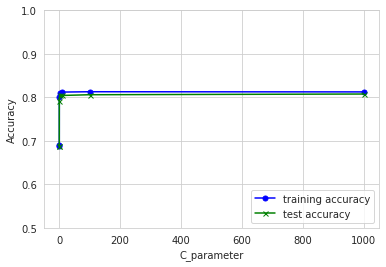

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
### 1. Use of validation curves for both datasets.
C_param_range = [0.001,0.01,0.1,1,10,100,1000]


# Apply logistic regression model to training data
lr = LogisticRegression(penalty='l2',C = i,random_state = 0, max_iter=1000)

# SEPAL Plot validation curve
train_score, test_score = validation_curve(estimator=lr
                                                            ,X=X
                                                            ,y=y
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])





Their is no way to increase its score by parameter tuning.
Only way to increase score is to feature engineer if that is possible.

Let us see how a neural network will perform on it.

In [318]:
from keras.models import Sequential
from keras.layers import Dense

# train2 is standard scaled data
train_data = X_train2.copy()
train_label = [1 if _=='Y' else 0 for _ in y_train]
test_data = X_val2.copy()
test_label = [1 if _=='Y' else 0 for _ in y_val]

input_dim = train_data.shape[1]
output_dim = 1

model = Sequential()
#first hidden layer
model.add(Dense(10,input_dim=input_dim, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_label, epochs=150, batch_size=10)

Epoch 1/150
411/411 [==============================] - 1s 1ms/step - loss: 0.5102 - accuracy: 0.8102
Epoch 2/150
411/411 [==============================] - 0s 257us/step - loss: 0.4944 - accuracy: 0.8127
Epoch 3/150
411/411 [==============================] - 0s 368us/step - loss: 0.4832 - accuracy: 0.8151
Epoch 4/150
411/411 [==============================] - 0s 309us/step - loss: 0.4756 - accuracy: 0.8151
Epoch 5/150
411/411 [==============================] - 0s 329us/step - loss: 0.4695 - accuracy: 0.8151
Epoch 6/150
411/411 [==============================] - 0s 303us/step - loss: 0.4645 - accuracy: 0.8151
Epoch 7/150
411/411 [==============================] - 0s 362us/step - loss: 0.4604 - accuracy: 0.8151
Epoch 8/150
411/411 [==============================] - 0s 265us/step - loss: 0.4577 - accuracy: 0.8151
Epoch 9/150
411/411 [==============================] - 0s 340us/step - loss: 0.4557 - accuracy: 0.8151
Epoch 10/150
411/411 [==============================] - 0s 338us/step - los

411/411 [==============================] - 0s 353us/step - loss: 0.4092 - accuracy: 0.8224
Epoch 80/150
411/411 [==============================] - 0s 247us/step - loss: 0.4094 - accuracy: 0.8224
Epoch 81/150
411/411 [==============================] - 0s 252us/step - loss: 0.4087 - accuracy: 0.8224
Epoch 82/150
411/411 [==============================] - 0s 229us/step - loss: 0.4080 - accuracy: 0.8224
Epoch 83/150
411/411 [==============================] - 0s 230us/step - loss: 0.4086 - accuracy: 0.8248
Epoch 84/150
411/411 [==============================] - 0s 262us/step - loss: 0.4087 - accuracy: 0.8224
Epoch 85/150
411/411 [==============================] - 0s 257us/step - loss: 0.4065 - accuracy: 0.8224
Epoch 86/150
411/411 [==============================] - 0s 264us/step - loss: 0.4064 - accuracy: 0.8248
Epoch 87/150
411/411 [==============================] - 0s 313us/step - loss: 0.4054 - accuracy: 0.8224
Epoch 88/150
411/411 [==============================] - 0s 244us/step - loss:

In [323]:
model.evaluate(test_data, test_label)

203/203 [==============================] - 0s 127us/step


[0.5520722720716974, 0.7881773114204407]

In [324]:
pred = model.predict_classes(test_data)
pred = pred.reshape(len(test_label),)

In [325]:
accuracy_score(pred, test_label)

0.7881773399014779

In [322]:
print(classification_report(pred, test_label))

              precision    recall  f1-score   support

           0       0.49      0.85      0.62        41
           1       0.95      0.77      0.85       162

    accuracy                           0.79       203
   macro avg       0.72      0.81      0.74       203
weighted avg       0.86      0.79      0.81       203



No betterment :(